In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
path='C:/Users/FT-LT74/Desktop/notes/github/time-series-forecasting-store-sales/data/interim/'

In [44]:
df=pd.read_csv(path+'merged_df.csv')
df

C:\Users\FT-LT74\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008770,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN
3008771,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN
3008772,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN
3008773,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,2155.0,47.57,NaN,NaN,NaN,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008775 entries, 0 to 3008774
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   store_type    object 
 9   cluster       int64  
 10  transactions  float64
 11  dcoilwtico    float64
 12  holiday_type  object 
 13  locale        object 
 14  locale_name   object 
 15  description   object 
 16  transferred   object 
dtypes: float64(3), int64(4), object(10)
memory usage: 390.2+ MB


In [47]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

## EDA plots

#### Sales performance

In [48]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [49]:
temp = df.groupby(by=['date','store_nbr'])['sales'].sum().to_frame().reset_index()
temp.set_index(['date'],inplace=True)
temp

,store_nbr,sales
date,,
2013-01-01,1,0.000000
2013-01-01,2,0.000000
2013-01-01,3,0.000000
2013-01-01,4,0.000000
2013-01-01,5,0.000000
...,...,...
2017-08-15,50,16879.121004
2017-08-15,51,20154.559000
2017-08-15,52,18600.046000


KeyError: "None of [DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',\n               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',\n               '2013-01-09', '2013-01-10',\n               ...\n               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',\n               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',\n               '2017-08-14', '2017-08-15'],\n              dtype='datetime64[ns]', name='date', length=1684, freq=None)] are in the [columns]"

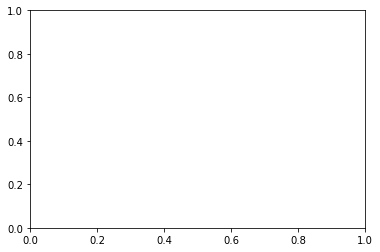

In [50]:
fig, ax = plt.subplots()
for label, grp in temp.groupby('store_nbr'):
    grp.plot(x = grp.index, y = 'sales', ax = ax, label = label)

<AxesSubplot:xlabel='store_nbr'>

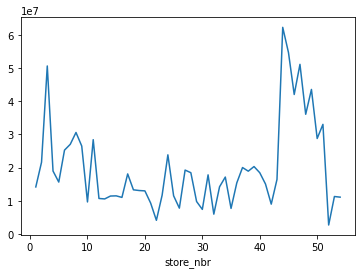

In [13]:
df.groupby(by=['store_nbr'])['sales'].sum().plot(kind='line', x='store_nbr', y='sales')

<AxesSubplot:title={'center':'Total Sales in Ecuador over Time'}, xlabel='date'>

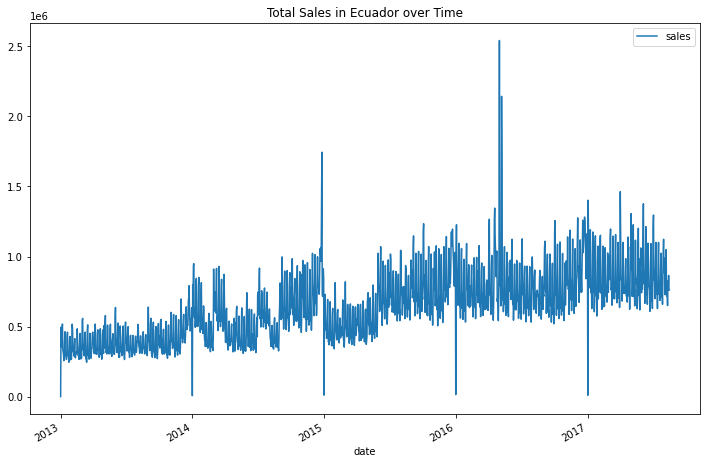

In [52]:
df.groupby(by=['date'])['sales'].sum().plot(kind='line', x='date', y='sales', 
                                            legend=True, figsize=(12,8), title='Total Sales in Ecuador over Time')

In [53]:
# using matplotlib
totalsales_over_time = df.groupby(by=['date'])['sales'].sum().to_frame().reset_index()
totalsales_over_time

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229
...,...,...
1679,2017-08-11,826373.722022
1680,2017-08-12,792630.535079
1681,2017-08-13,865639.677471
1682,2017-08-14,760922.406081


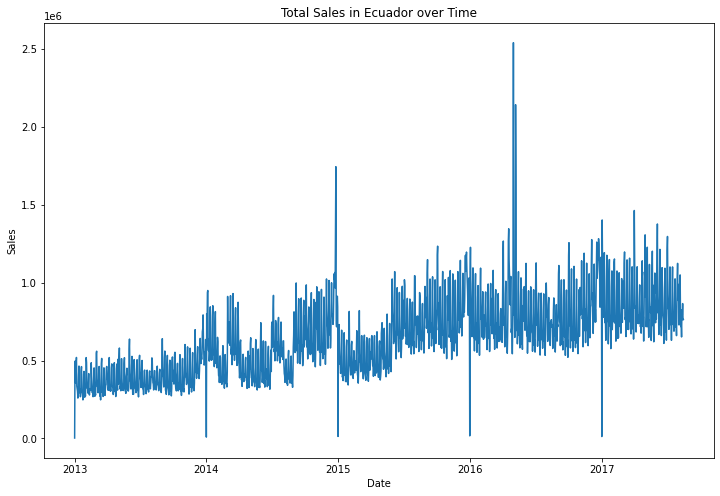

In [66]:
plt.figure(figsize=(12,8))
plt.plot(totalsales_over_time['date'], totalsales_over_time['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title('Total Sales in Ecuador over Time')
plt.show()
plt.close()

In [68]:
totalsales_by_store= df.groupby(by=['store_nbr'])['sales'].sum().to_frame().reset_index()
totalsales_by_store.head()

,store_nbr,sales
0,1,1.417755e+07
1,2,2.162876e+07
2,3,5.065960e+07
3,4,1.897815e+07
4,5,1.564707e+07


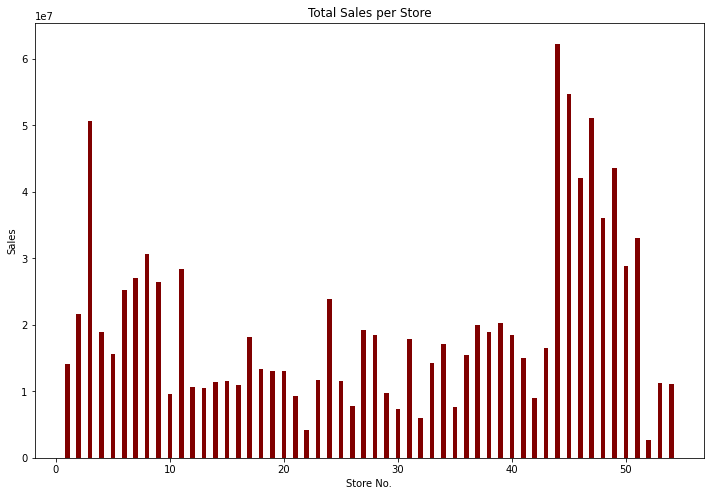

In [69]:
plt.figure(figsize=(12,8))
plt.bar(totalsales_by_store['store_nbr'], totalsales_by_store['sales'], color ='maroon', width = 0.4)
plt.xlabel("Store No.")
plt.ylabel("Sales")
plt.title("Total Sales per Store")
plt.show()
plt.close()

## Data Cleaning: check for NAs

In [ ]:
df.isna().any()

## check is holiday is celebrated where the store is located

matching by:
* locale='Local', store's city
* locale='Regional', store's state

In [ ]:
df['city'].unique()

In [ ]:
df['state'].unique()

In [ ]:
df['locale_name'].unique()

In [ ]:
df['locale'].unique()

In [ ]:
df[(df['state']==df['locale_name']) & (df['locale']=='Regional')]

In [ ]:
df[(df['city']==df['locale_name'])  & (df['locale']=='Local')]

In [ ]:
df[(df['state']==df['locale_name']) & (df['locale']=='Local')]  ## city and state name are the same